In [30]:
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster

In [4]:
%matplotlib inline

plt.style.use("bmh")
sns.set(style="whitegrid")

### 2. Loading and preprosessing the dataset

##### 2.1 Reading the data

In [5]:
df = pd.read_csv("./rents_basel.csv")
df

,id,categories,price (CHF),latitude,longitude,city,living_space (m2),num_rooms,floor,num_floors,year_built,is_new_building,is_old_building,year_last_renovated,street,postal_code
0,4001808482,"['APARTMENT', 'FLAT']",2030.0,47.544604,7.574457,Basel,69.0,3.5,NaN,5.0,1945.0,NaN,True,2020.0,Holeestrasse 10,4054
1,4001750179,"['APARTMENT', 'DUPLEX']",7860.0,47.556324,7.587249,Basel,200.0,5.5,2.0,3.0,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
2,4001750180,"['APARTMENT', 'FLAT']",3580.0,47.553728,7.586080,Basel,81.0,4.0,1.0,NaN,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
3,4001668319,"['APARTMENT', 'FLAT']",3290.0,47.569773,7.603460,Basel,95.0,4.5,3.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058
4,4001668318,"['APARTMENT', 'FLAT']",3980.0,47.569773,7.603460,Basel,130.0,5.5,1.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,4001812796,"['APARTMENT', 'FLAT']",92.0,47.551153,7.568887,Basel,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Gotthelf Quartier;,4054
941,4001738659,"['APARTMENT', 'FLAT']",2570.0,47.561254,7.565575,Basel,130.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4055
942,4001715457,"['APARTMENT', 'FLAT']",1850.0,47.574254,7.593065,Basel,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4057
943,4001824797,"['APARTMENT', 'FLAT']",NaN,47.569443,7.593381,Basel,62.0,3.5,2.0,NaN,NaN,NaN,NaN,NaN,Amerbachstrasse 45,4057


##### 2.2 Preprosessing

In [6]:
df.rename(
{
    'living_space (m2)':'sizes',
    'num_rooms':'rooms',
    'price (CHF)':'prices',
},
axis=1, inplace=True)

df.head()

,id,categories,prices,latitude,longitude,city,sizes,rooms,floor,num_floors,year_built,is_new_building,is_old_building,year_last_renovated,street,postal_code
0,4001808482,"['APARTMENT', 'FLAT']",2030.0,47.544604,7.574457,Basel,69.0,3.5,NaN,5.0,1945.0,NaN,True,2020.0,Holeestrasse 10,4054
1,4001750179,"['APARTMENT', 'DUPLEX']",7860.0,47.556324,7.587249,Basel,200.0,5.5,2.0,3.0,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
2,4001750180,"['APARTMENT', 'FLAT']",3580.0,47.553728,7.586080,Basel,81.0,4.0,1.0,NaN,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
3,4001668319,"['APARTMENT', 'FLAT']",3290.0,47.569773,7.603460,Basel,95.0,4.5,3.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058
4,4001668318,"['APARTMENT', 'FLAT']",3980.0,47.569773,7.603460,Basel,130.0,5.5,1.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058


##### 2.3 Cleaning Dataset

In [7]:
df.drop("id", axis=1, inplace=True)
df.head()

,categories,prices,latitude,longitude,city,sizes,rooms,floor,num_floors,year_built,is_new_building,is_old_building,year_last_renovated,street,postal_code
0,"['APARTMENT', 'FLAT']",2030.0,47.544604,7.574457,Basel,69.0,3.5,NaN,5.0,1945.0,NaN,True,2020.0,Holeestrasse 10,4054
1,"['APARTMENT', 'DUPLEX']",7860.0,47.556324,7.587249,Basel,200.0,5.5,2.0,3.0,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
2,"['APARTMENT', 'FLAT']",3580.0,47.553728,7.586080,Basel,81.0,4.0,1.0,NaN,NaN,NaN,True,2024.0,Unterer Heuberg 15,4051
3,"['APARTMENT', 'FLAT']",3290.0,47.569773,7.603460,Basel,95.0,4.5,3.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058
4,"['APARTMENT', 'FLAT']",3980.0,47.569773,7.603460,Basel,130.0,5.5,1.0,NaN,NaN,True,NaN,NaN,Erlenmattstr. 83,4058


### 3. Descriptive Analysis

##### 3.1 Dimension Dataset

In [8]:
df.shape

(945, 15)

##### 3.2 General Information Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   categories           945 non-null    object 
 1   prices               934 non-null    float64
 2   latitude             945 non-null    float64
 3   longitude            945 non-null    float64
 4   city                 945 non-null    object 
 5   sizes                839 non-null    float64
 6   rooms                903 non-null    float64
 7   floor                749 non-null    float64
 8   num_floors           76 non-null     float64
 9   year_built           430 non-null    float64
 10  is_new_building      49 non-null     object 
 11  is_old_building      88 non-null     object 
 12  year_last_renovated  285 non-null    float64
 13  street               927 non-null    object 
 14  postal_code          945 non-null    int64  
dtypes: float64(9), int64(1), object(5)
memor

In [10]:
df.describe()

,prices,latitude,longitude,sizes,rooms,floor,num_floors,year_built,year_last_renovated,postal_code
count,934.000000,945.000000,945.000000,839.000000,903.000000,749.000000,76.000000,430.000000,285.000000,945.000000
mean,2704.308351,47.557799,7.591955,85.371871,3.741971,3.053405,3.947368,1964.841860,2015.347368,4054.217989
std,1478.738905,0.026600,0.025059,48.226395,1.145162,2.045559,2.109627,71.145755,10.992413,6.531467
min,46.000000,46.818180,7.556577,2.000000,1.000000,-2.000000,1.000000,1345.000000,1976.000000,4000.000000
25%,1980.000000,47.549784,7.582345,59.000000,3.000000,2.000000,3.000000,1951.000000,2010.000000,4053.000000
50%,2460.000000,47.559849,7.592748,79.000000,4.000000,3.000000,4.000000,1968.000000,2020.000000,4055.000000
75%,3060.000000,47.568304,7.599635,99.000000,4.500000,4.000000,5.000000,2009.000000,2024.000000,4057.000000
max,18970.000000,47.587225,8.227518,560.000000,12.000000,16.000000,16.000000,2025.000000,2025.000000,4059.000000


In [11]:
df['prices'].value_counts()

prices
2720.0     16
2030.0     14
2300.0     13
2580.0     13
2530.0     13
           ..
3340.0      1
1130.0      1
16450.0     1
1690.0      1
92.0        1
Name: count, Length: 352, dtype: int64

In [12]:
df['rooms'].value_counts()

rooms
4.5     176
4.0     159
3.5     145
3.0     126
2.0      94
2.5      68
5.5      64
5.0      33
6.5      11
6.0       8
1.0       7
1.5       5
7.0       3
7.5       2
12.0      1
8.5       1
Name: count, dtype: int64

In [13]:
df['sizes'].value_counts()

sizes
130.0    38
69.0     24
75.0     23
140.0    21
80.0     19
         ..
250.0     1
128.0     1
146.0     1
66.0      1
5.0       1
Name: count, Length: 117, dtype: int64

##### 3.3 Checking null variables

In [14]:
df.isnull()

,categories,prices,latitude,longitude,city,sizes,rooms,floor,num_floors,year_built,is_new_building,is_old_building,year_last_renovated,street,postal_code
0,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False
4,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False
941,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
942,False,False,False,False,False,True,False,True,True,True,True,True,True,True,False
943,False,True,False,False,False,False,False,False,True,True,True,True,True,False,False


In [15]:
df.isnull().sum()

categories               0
prices                  11
latitude                 0
longitude                0
city                     0
sizes                  106
rooms                   42
floor                  196
num_floors             869
year_built             515
is_new_building        896
is_old_building        857
year_last_renovated    660
street                  18
postal_code              0
dtype: int64

In [16]:
df.isnull().sum(axis=1)

0      2
1      2
2      3
3      4
4      4
      ..
940    6
941    7
942    8
943    6
944    8
Length: 945, dtype: int64

### 4. Univariate Analysis

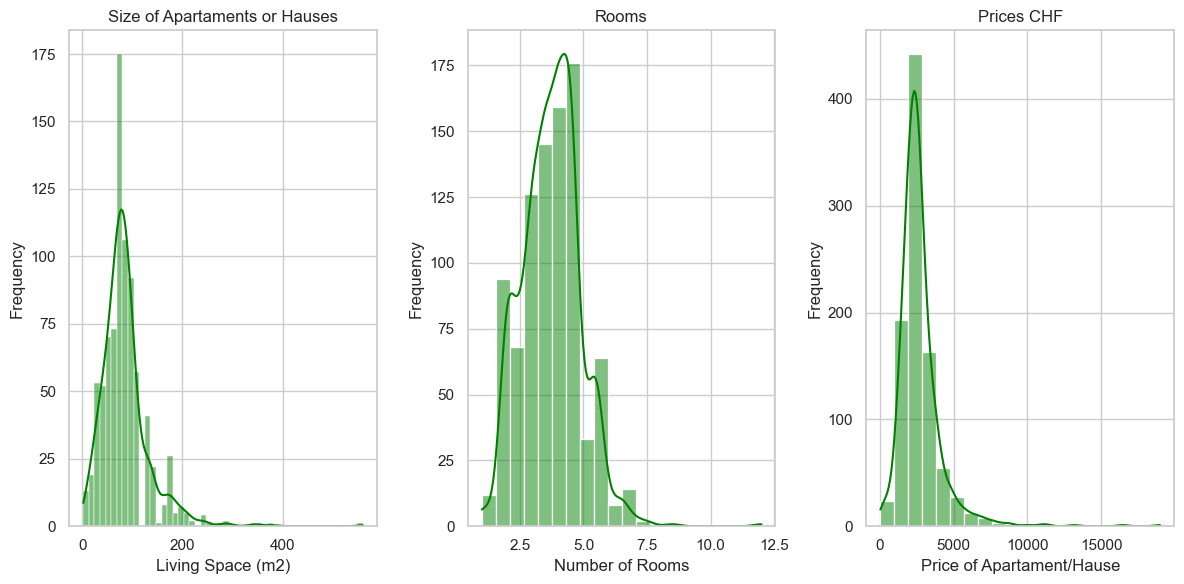

In [17]:
plt.figure(figsize=(12,6))
# 1. Histogram "Sizes"
plt.subplot(1, 3, 1)
sns.histplot(df['sizes'], kde=True, bins=50, color="green")
plt.xlabel("Living Space (m2)")
plt.ylabel("Frequency")
plt.title("Size of Apartaments or Hauses")

# Histogram "Rooms"
plt.subplot(1, 3, 2)
sns.histplot(df['rooms'], kde=True, bins=20, color="green")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.title("Rooms")

#Histogram "Pices"
plt.subplot(1, 3, 3)
sns.histplot(df['prices'], kde=True, bins=20, color="green")
plt.title("Prices CHF")
plt.xlabel("Price of Apartament/Hause")
plt.ylabel("Frequency")

# Show Graph
plt.tight_layout()
plt.show()

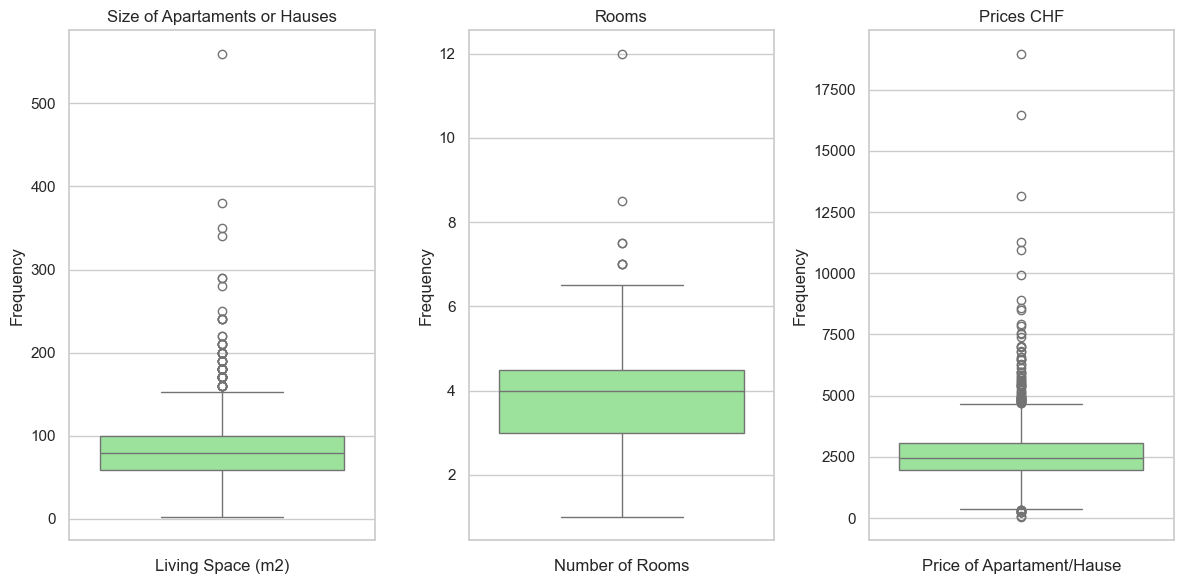

In [18]:
### Boxplot

plt.figure(figsize=(12, 6))

### Sizes or Living Space
plt.subplot(1, 3, 1)
sns.boxplot(y=df['sizes'], color='lightgreen')
plt.xlabel("Living Space (m2)")
plt.ylabel("Frequency")
plt.title("Size of Apartaments or Hauses")

### Number of Rooms
plt.subplot(1, 3, 2)
sns.boxplot(y=df['rooms'], color='lightgreen')
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.title("Rooms")

### Prices (CHF)
plt.subplot(1, 3, 3)
sns.boxplot(y=df['prices'], color='lightgreen')
plt.title("Prices CHF")
plt.xlabel("Price of Apartament/Hause")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 5. Multivariate Analysis

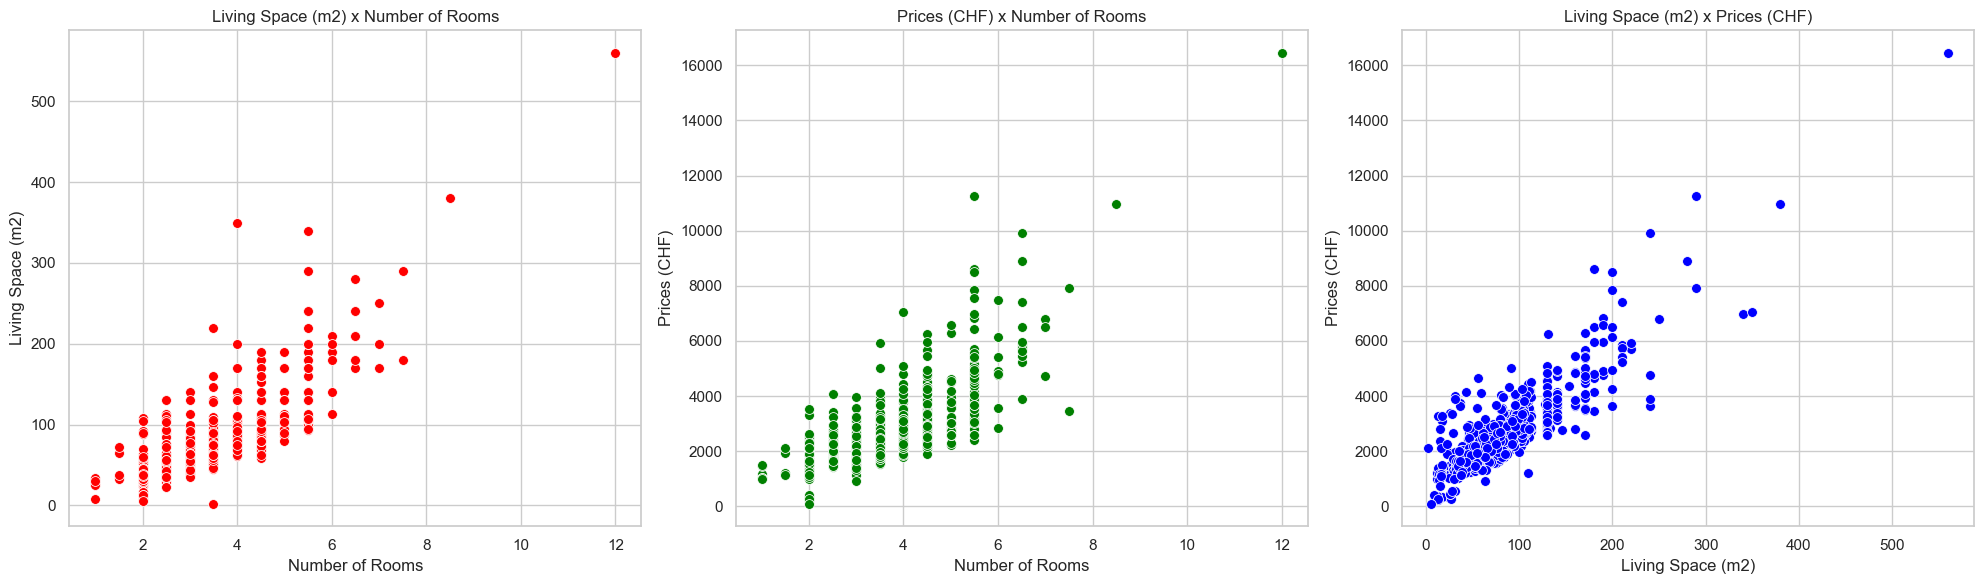

In [19]:
new_df = df[['sizes', 'rooms', 'prices']]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=new_df, x=new_df['rooms'], y=new_df['sizes'], s=50, c="red", ax=axs[0])
axs[0].set_title('Living Space (m2) x Number of Rooms')
axs[0].set_xlabel('Number of Rooms')
axs[0].set_ylabel('Living Space (m2)')

sns.scatterplot(data=new_df, x=new_df['rooms'], y=new_df['prices'], s=50, c="green", ax=axs[1])
axs[1].set_title('Prices (CHF) x Number of Rooms')
axs[1].set_xlabel('Number of Rooms')
axs[1].set_ylabel('Prices (CHF)')

sns.scatterplot(data=new_df, x=new_df['sizes'], y=new_df['prices'], s=50, c="blue", ax=axs[2])
axs[2].set_title('Living Space (m2) x Prices (CHF)')
axs[2].set_xlabel('Living Space (m2)')
axs[2].set_ylabel('Prices (CHF)')

plt.tight_layout()
plt.show()

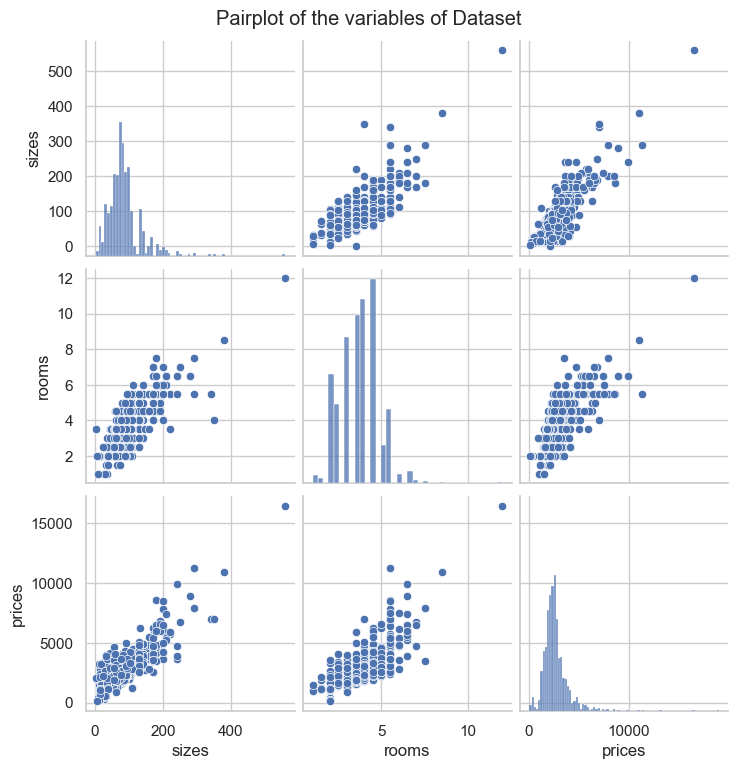

In [20]:
sns.pairplot(new_df)
plt.suptitle('Pairplot of the variables of Dataset', y=1.02)
plt.show()

##### 5.1 Correlation between variables

In [21]:
new_df.corr()

,sizes,rooms,prices
sizes,1.000000,0.783521,0.862103
rooms,0.783521,1.000000,0.728039
prices,0.862103,0.728039,1.000000


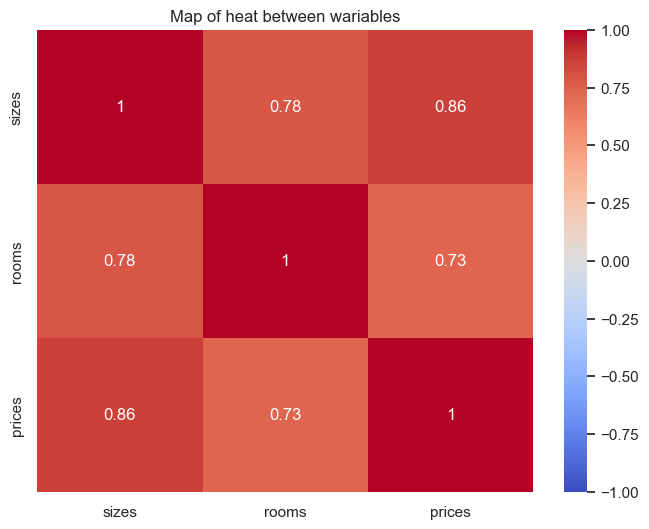

In [22]:
plt.figure(figsize=(8, 6))
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Map of heat between wariables')

plt.show()

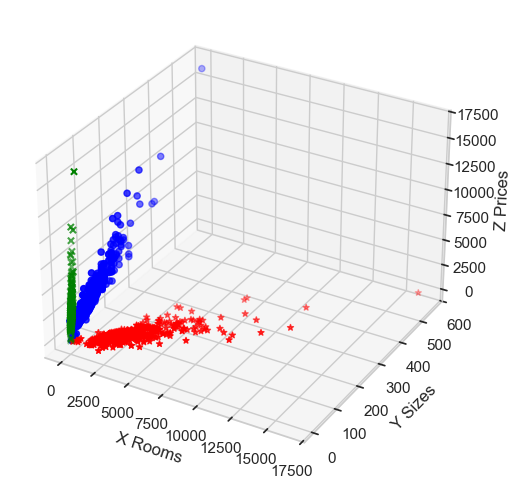

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    new_df['rooms'],
    new_df['sizes'],
    new_df['prices'],
    c='blue',
    marker='o',
)

scatter = ax.scatter(
    new_df['sizes'],
    new_df['rooms'],
    new_df['prices'],
    c='green',
    marker='x',
)

scatter = ax.scatter(
    new_df['prices'],
    new_df['sizes'],
    new_df['rooms'],
    c='red',
    marker='*',
)

ax.set_xlabel('X Rooms')
ax.set_ylabel('Y Sizes')
ax.set_zlabel('Z Prices')

plt.show()

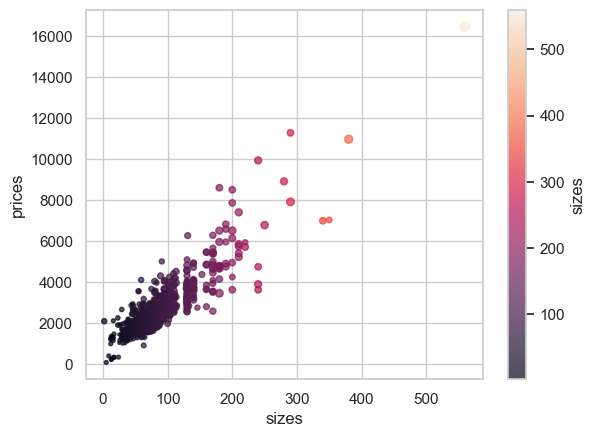

In [25]:
df.plot(kind='scatter', x='sizes', y='prices', alpha=0.7, s=new_df['rooms'] * 4, c='sizes', colorbar=True)
plt.show()

In [39]:
locations = df[['latitude', 'longitude']].to_numpy()
map = folium.Map(location=[47.55839, 7.57327], zoom_start=12)

MarkerCluster(locations=locations, min_opacity=0.4, max_val=0.1, radius=15).add_to(map)

In [40]:
map

In [48]:
df['latitude']

0      47.544604
1      47.556324
2      47.553728
3      47.569773
4      47.569773
         ...    
940    47.551153
941    47.561254
942    47.574254
943    47.569443
944    47.574254
Name: latitude, Length: 945, dtype: float64